### Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
#test = pd.read_csv('test.csv')
stores = pd.read_csv('/content/drive/MyDrive/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/features.csv')

In [4]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [6]:
stores.groupby("Type")['Type'].value_counts()

Type  Type
A     A       22
B     B       17
C     C        6
Name: Type, dtype: int64

In [7]:
# merge the dataset
a = ['Store']
featuress = features.merge(stores,how='inner',on = a)
train_com = train.merge(featuress,how = 'inner', on = ['Store','Date','IsHoliday'])
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


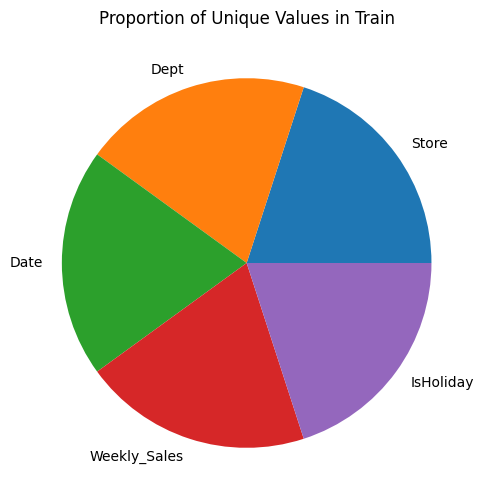

In [8]:
column_names = train.columns
column_counts = [1] * len(column_names)

# Pie plot of variable in train
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Train')
plt.show()

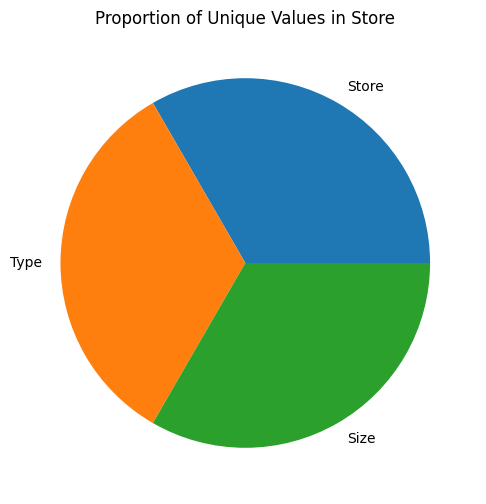

In [9]:
column_names = stores.columns
column_counts = [1] * len(column_names)

# Pie plot of variable in Store
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Store')

plt.show()

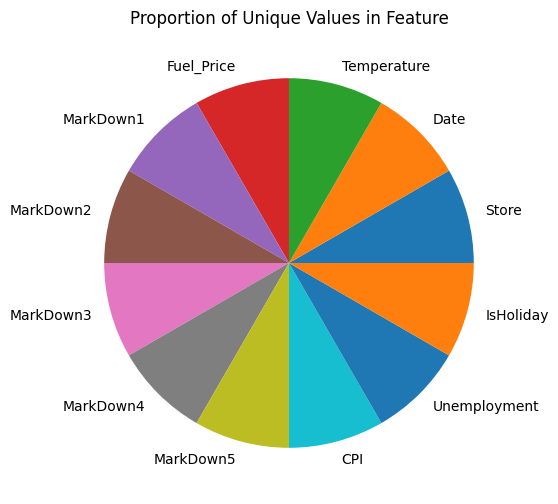

In [10]:
column_names = features.columns
column_counts = [1] * len(column_names)

# # Pie plot of variable in Feature
column_df = pd.DataFrame({'Column': column_names, 'Count': column_counts})
plt.figure(figsize=(8, 6))
plt.pie(column_df['Count'], labels=column_df['Column'])
plt.title('Proportion of Unique Values in Feature')
plt.show()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### Data Prepocessing

In [12]:
# create year, month, and date week
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
train['month'] = train['Date'].apply(lambda i : i.month)
train['day'] = train['Date'].apply(lambda i : i.day)
train['year'] =train['Date'].apply(lambda i : i.year)
train['week'] = train['Date'].apply(lambda i : i.week)

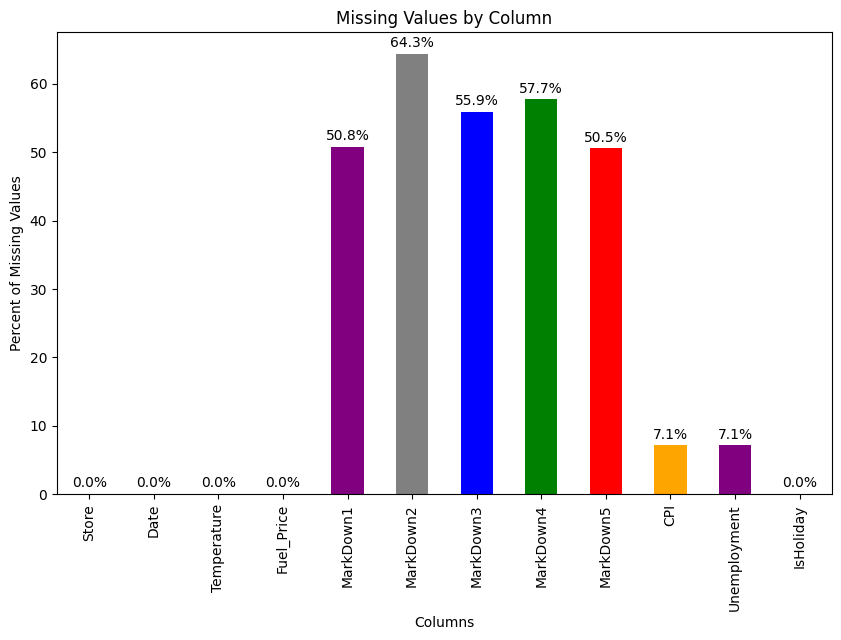

In [13]:
# check the missing values
# calculate the percentage of missing values in each column
missing_percent = features.isnull().mean() * 100

colors = ['blue', 'green', 'red', 'orange', 'purple', 'gray']

ax = missing_percent.plot(kind='bar', figsize=(10, 6),color = colors)
for i, v in enumerate(missing_percent):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

ax.set_xlabel('Columns')
ax.set_ylabel('Percent of Missing Values')
ax.set_title('Missing Values by Column')
plt.show()

In [14]:
median = features.median()
features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
features[['CPI','Unemployment']] = features[['CPI','Unemployment']].fillna(median)
features

<ipython-input-14-ae383b382a64>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median = features.median()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False


In [15]:
train.describe()

,Store,Dept,Weekly_Sales,month,day,year,week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,6.449510,15.673131,2010.968591,25.826762
std,12.785297,30.492054,22711.183519,3.243217,8.753549,0.796876,14.151887
min,1.000000,1.000000,-4988.940000,1.000000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,4.000000,8.000000,2010.000000,14.000000
50%,22.000000,37.000000,7612.030000,6.000000,16.000000,2011.000000,26.000000
75%,33.000000,74.000000,20205.852500,9.000000,23.000000,2012.000000,38.000000
max,45.000000,99.000000,693099.360000,12.000000,31.000000,2012.000000,52.000000


In [16]:
# mergethe dataset
a = ['Store']
features = features.merge(stores,how='inner',on = a)
train = train.merge(features,how = 'inner', on = ['Store','Date','IsHoliday'])

In [17]:
train.sort_values(by=['Date'],inplace=True)
train.set_index(train.Date, inplace=True)

In [18]:
# remove all the negative weekly sales
train = train[train.Weekly_Sales > 0]

In [19]:
train.shape

(420212, 20)

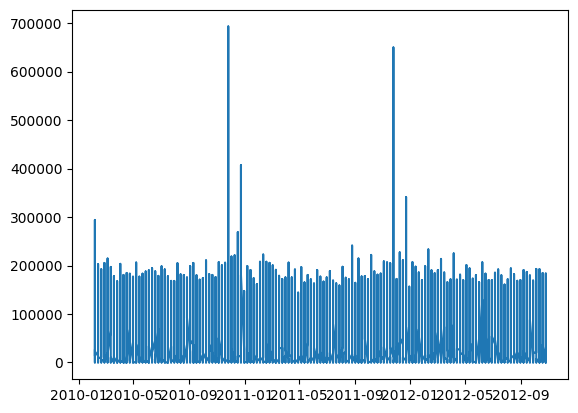

In [20]:
plt.plot(train['Weekly_Sales'])

### Data Visualization

<ipython-input-21-72e3a48f6955>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.groupby('week').sum()


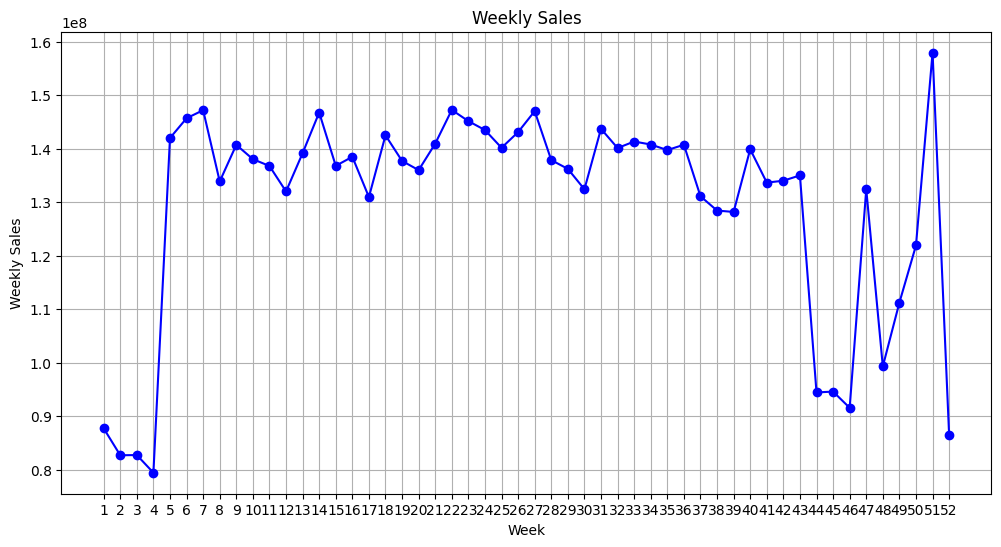

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


weekly = train.groupby('week').sum()

x = weekly.index
y = weekly['Weekly_Sales']

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.xticks(x)
plt.grid(True)
plt.show()

<ipython-input-22-8ec634e23275>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.groupby(['week', 'year']).mean()['Weekly_Sales']


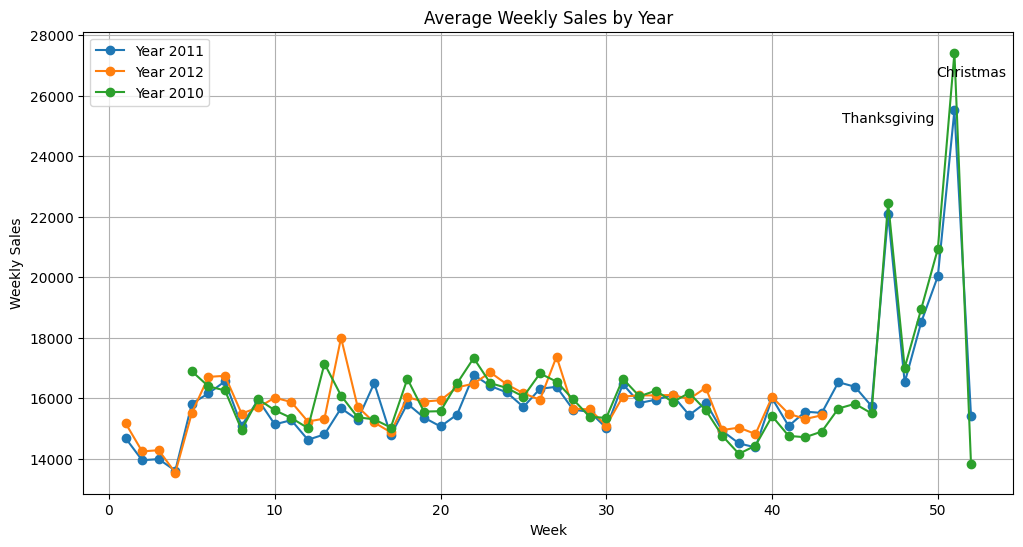

In [22]:
# Group the data by week and year and calculate the sum of weekly sales
weekly = train.groupby(['week', 'year']).mean()['Weekly_Sales']
plt.figure(figsize=(12, 6))

for year in weekly.index.get_level_values('year').unique():
    year_data = weekly.loc[:, year]
    plt.plot(year_data.index, year_data.values, marker='o', linestyle='-', label=f'Year {year}')
    
plt.title('Average Weekly Sales by Year')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)

thanksgiving_week = 47  
christmas_week = 52 

plt.text(thanksgiving_week, 25000, 'Thanksgiving', ha='center', va='bottom', fontsize=10)
plt.text(christmas_week, 27000, 'Christmas', ha='center', va='top', fontsize=10)

plt.show()

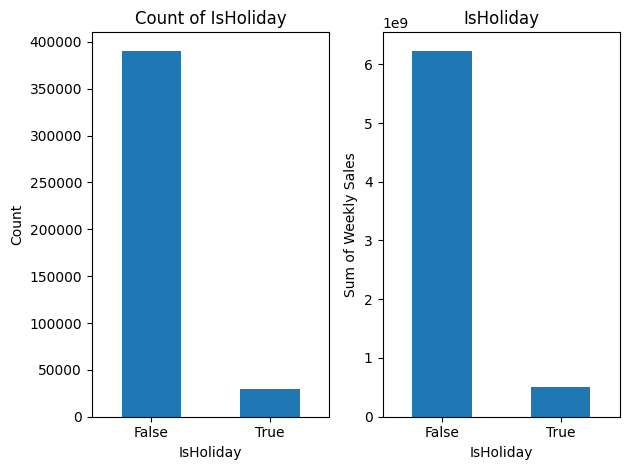

In [23]:
# Count of IsHoliday
plt.subplot(1, 2, 1)
train['IsHoliday'].value_counts().plot(kind='bar')
plt.title('Count of IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Sum of Weekly_Sales by IsHoliday
plt.subplot(1, 2, 2)
train.groupby('IsHoliday')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Sum of Weekly Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

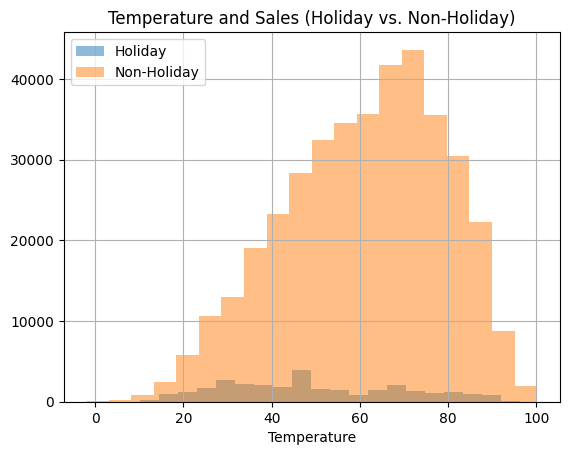

In [24]:
# Separate the data for holiday and non-holiday weeks
holiday_data = train[train['IsHoliday'] == 1]
non_holiday_data = train[train['IsHoliday'] == 0]

# Plot the histogram for Temperature and Sales for holiday weeks
plt.hist(holiday_data['Temperature'], bins=20, alpha=0.5, label='Holiday')
plt.hist(non_holiday_data['Temperature'], bins=20, alpha=0.5, label='Non-Holiday')

plt.title('Temperature and Sales (Holiday vs. Non-Holiday)')
plt.xlabel('Temperature')
plt.legend()
plt.grid(True)

plt.show()


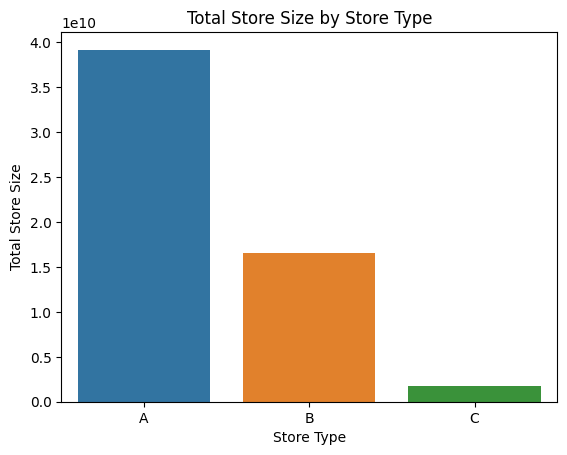

In [25]:
grouped_sizes = train.groupby('Type').Size.sum().reset_index()

# Create the barplot of Total Store Size by Store Type
sns.barplot(x='Type', y='Size', data=grouped_sizes)
plt.xlabel("Store Type")
plt.ylabel("Total Store Size")
plt.title("Total Store Size by Store Type")
plt.show()

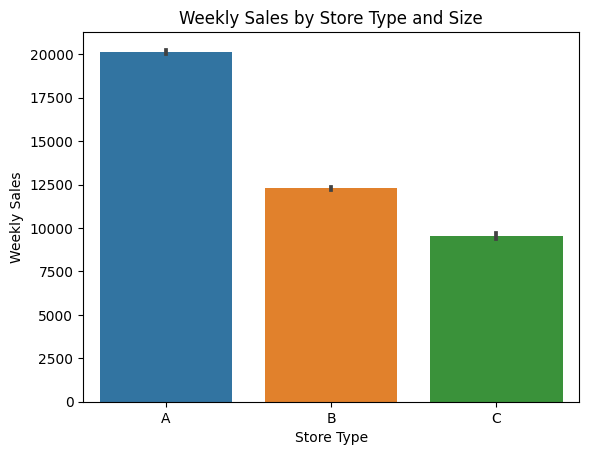

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the barplot of Weekly Sales by Store Type and Size
sns.barplot(x="Type", y="Weekly_Sales", data=train)
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales by Store Type and Size")
plt.show()

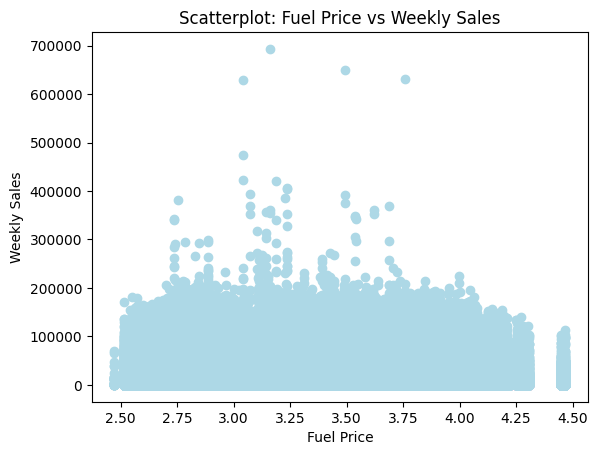

In [27]:

# Plot scatterplot
plt.scatter(train['Fuel_Price'], train['Weekly_Sales'], color='lightblue')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Scatterplot: Fuel Price vs Weekly Sales')
plt.show()


In [28]:
sales = train.groupby('IsHoliday')['Weekly_Sales'].mean()
counts = train.IsHoliday.value_counts()
print(sales)
print(counts)

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64
False    390652
True      29560
Name: IsHoliday, dtype: int64


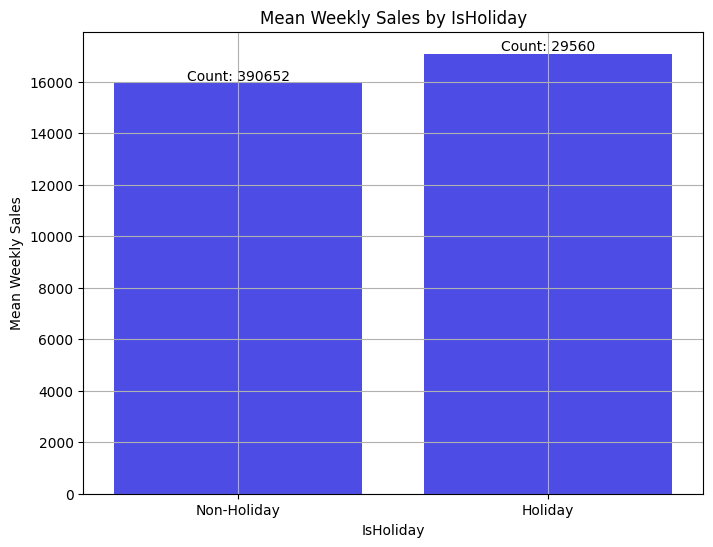

In [29]:
# Create a bar plot of mean weekly sales by IsHoliday
plt.figure(figsize=(8, 6))
sns.barplot(x=sales.index, y=sales.values, color='blue', alpha=0.8)
plt.xlabel('IsHoliday')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by IsHoliday')
plt.xticks(range(len(sales)), ['Non-Holiday', 'Holiday'])  # Assuming '0' represents Non-Holiday and '1' represents Holiday
plt.grid(True)
for i, count in enumerate(counts.values):
    plt.text(i, sales.values[i], f'Count: {count}', ha='center', va='bottom')

plt.show()

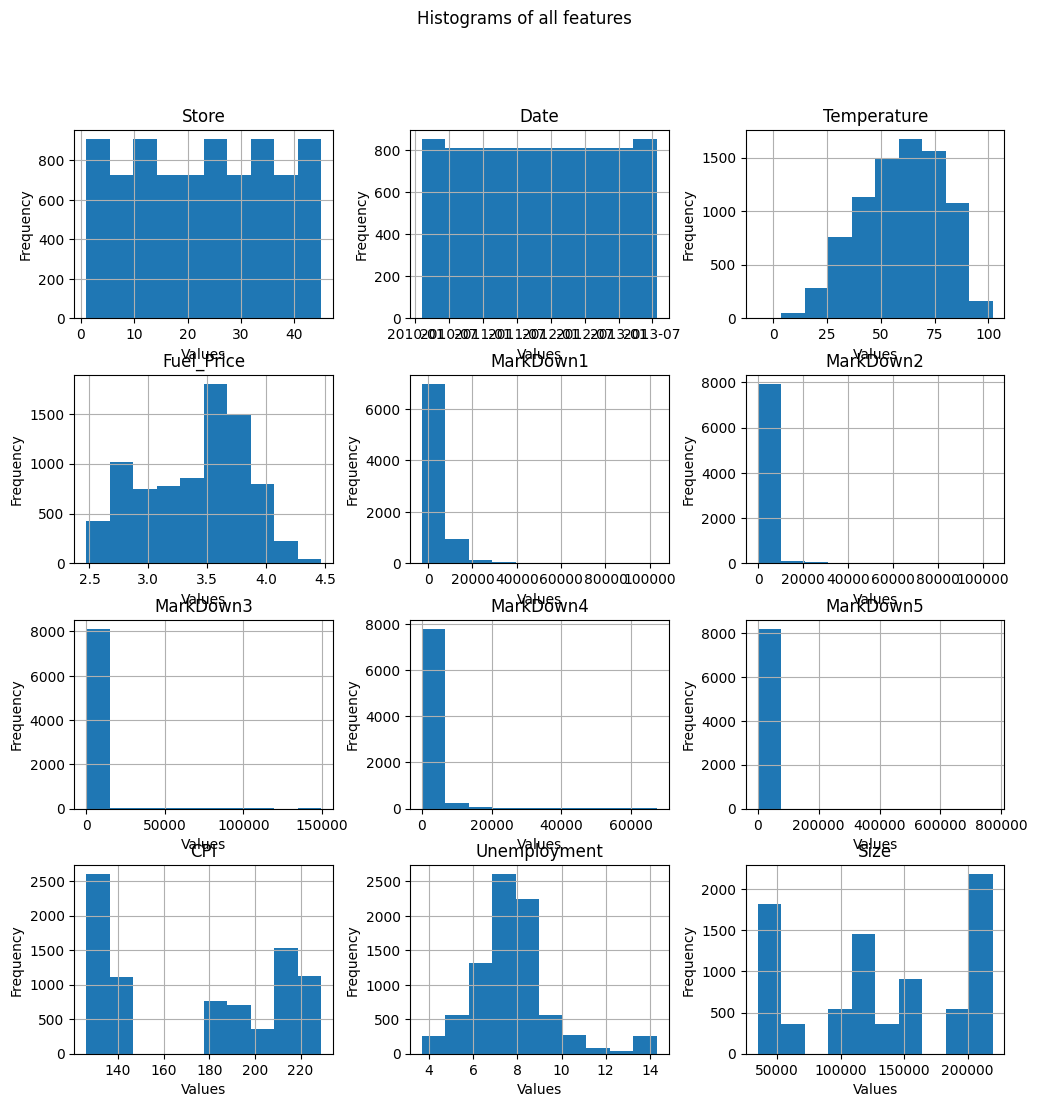

In [30]:
# create a histogram for each feature using pandas
ax = features.hist(figsize=(12,12))

for axes in ax.flatten():
    axes.set_xlabel("Values")
    axes.set_ylabel("Frequency")
plt.suptitle("Histograms of all features")
plt.show()

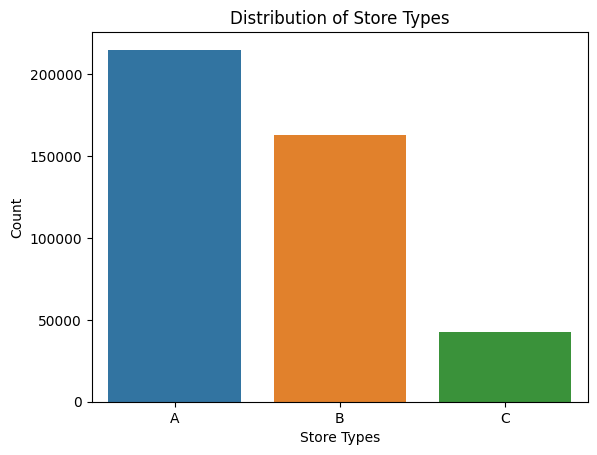

In [31]:

# create a bar plot of the distribution of Store Types
sns.countplot(x='Type', data=train)
plt.xlabel('Store Types')
plt.ylabel('Count')
plt.title('Distribution of Store Types')

plt.show()

# The majority of the Walmart stores included in this study belong to Type ‘A’.

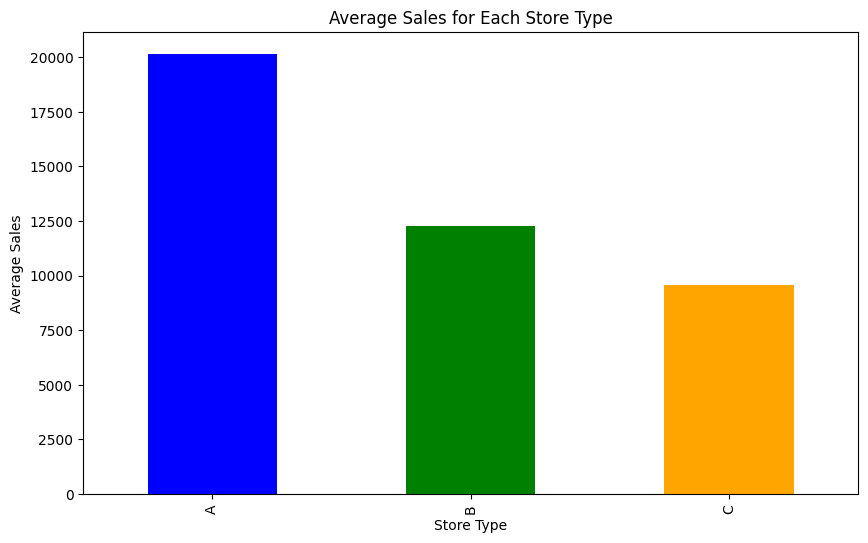

In [32]:
# Calculate the average sales for each store type
average_sales = train.groupby('Type')['Weekly_Sales'].mean()
colors = ['blue', 'green', 'orange']
# Plotting the average sales for each store type
plt.figure(figsize=(10, 6))
average_sales.plot(kind='bar',color = colors)
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales for Each Store Type')
plt.show()

In [33]:
grouped = train.groupby(["Dept", "Store"])
result = grouped.agg({"Dept": 'sum'})
result

Dept
Dept Store      
1    1       143
     2       143
     3       143
     4       143
     5       143
...          ...
99   39     4059
     40     3564
     41     4257
     43      396
     44      198

[3323 rows x 1 columns]

<ipython-input-34-420f094dee14>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr(method='spearman')


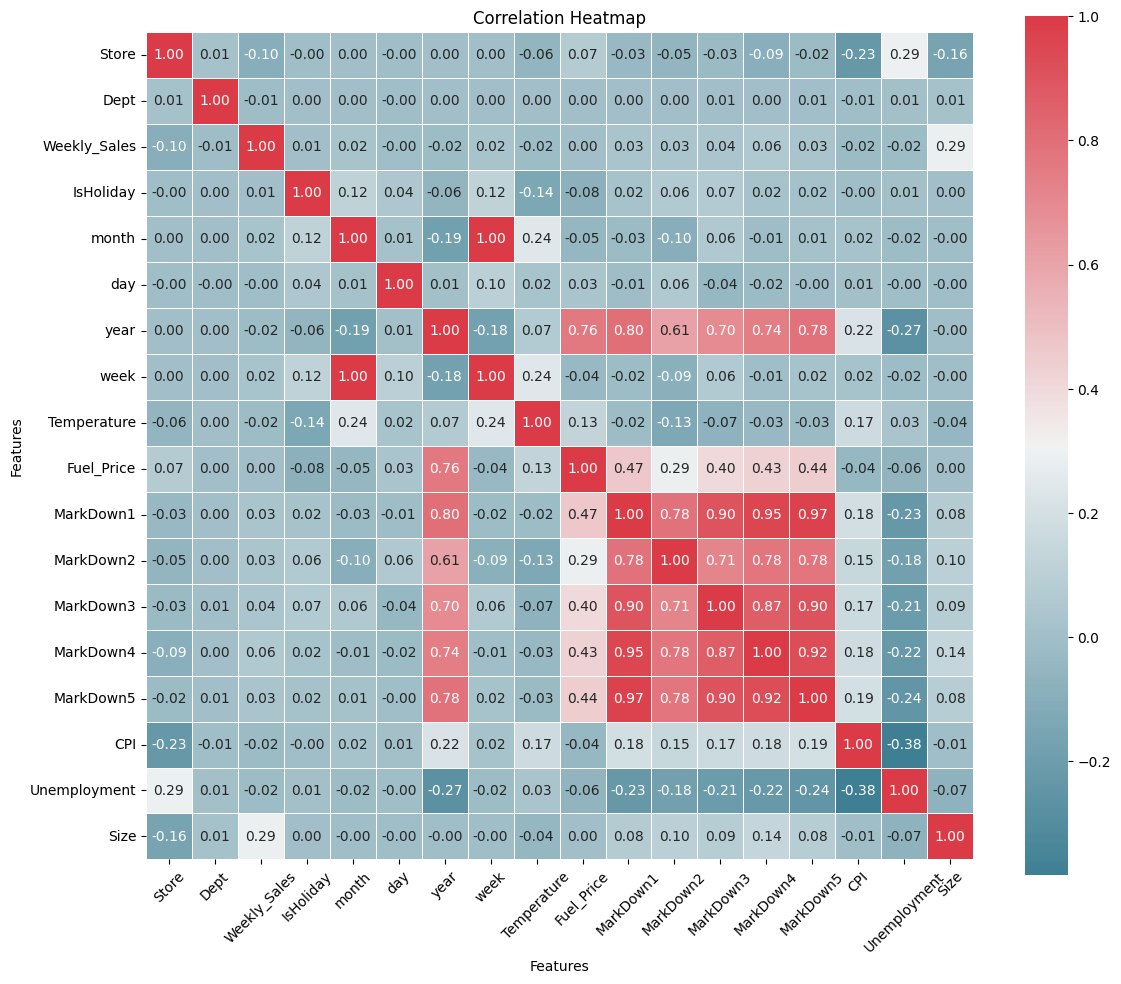

In [34]:
import seaborn as sns
#train = train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)
corr = train.corr(method='spearman')


plt.figure(figsize=(12, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f", square=True)

plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()